In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import Data_clening_functions as clean

pd.set_option("display.max_columns", None)
data_set = pd.read_csv(
    r"/home/ahmed/Ai/Data science and Ml projects/House-Prices-Prediction---Data-Science-Ml-project/original Data sets/train.csv"
)
test_df = pd.read_csv(
    r"/home/ahmed/Ai/Data science and Ml projects/House-Prices-Prediction---Data-Science-Ml-project/original Data sets/test.csv"
)
df = data_set

In [2]:
feature = df[
    [
        "LotArea",
        "OverallQual",
        "YearBuilt",
        "YearRemodAdd",
        "GarageYrBlt",
        "FullBath",
        "TotalBsmtSF",
        "Fireplaces",
        "TotRmsAbvGrd",
        "GrLivArea",
        "GarageArea",
        "GarageCars",
        "SalePrice",
    ]
]
test = test_df[
    [
        "LotArea",
        "OverallQual",
        "YearBuilt",
        "YearRemodAdd",
        "GarageYrBlt",
        "FullBath",
        "TotalBsmtSF",
        "Fireplaces",
        "TotRmsAbvGrd",
        "GrLivArea",
        "GarageArea",
        "GarageCars",
        "SalePrice",
    ]
]

<a id="intro"></a>

<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            1. renaming:
            </span>   
        </font>    
</h2>


In [3]:
feature = clean.rename_columns(feature)
test = clean.rename_columns(test)

<a id="intro"></a>

<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            2. fill missing values:
            </span>   
        </font>    
</h2>


In [4]:
feature = clean.missing_values(feature)
test = clean.missing_values(test)

<a id="intro"></a>

<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            3. Outliers:
            </span>   
        </font>    
</h2>


<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            1.1 SalePrice :
            </span>   
        </font>    
</h3>


527331.9149999974
61815.97


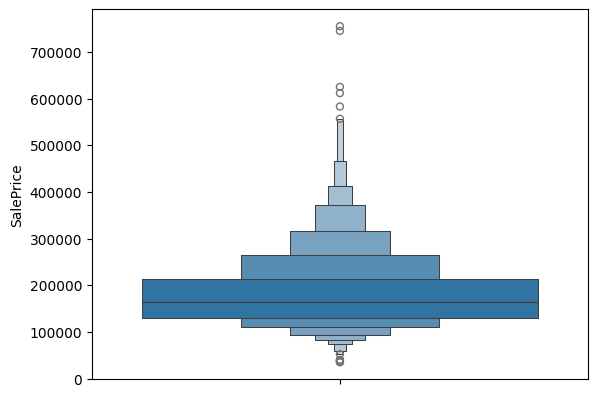

In [5]:
sns.boxenplot(feature["SalePrice"])

print(feature["SalePrice"].quantile(0.995))
print(feature["SalePrice"].quantile(0.01))

In [6]:
Q1 = feature["SalePrice"].quantile(0.01)
Q2 = feature["SalePrice"].quantile(0.995)

df = clean.remove_outliers_quantile(Q1, Q2, "SalePrice", feature)

23


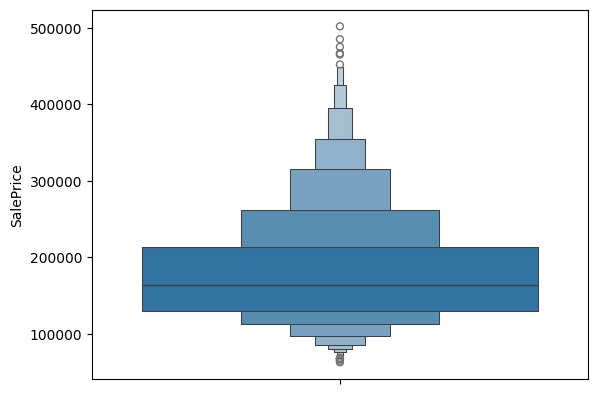

In [7]:
sns.boxenplot(df["SalePrice"])
feature = df

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            1.2 year_built:
            </span>   
        </font>    
</h3>


2009.0
1908.0


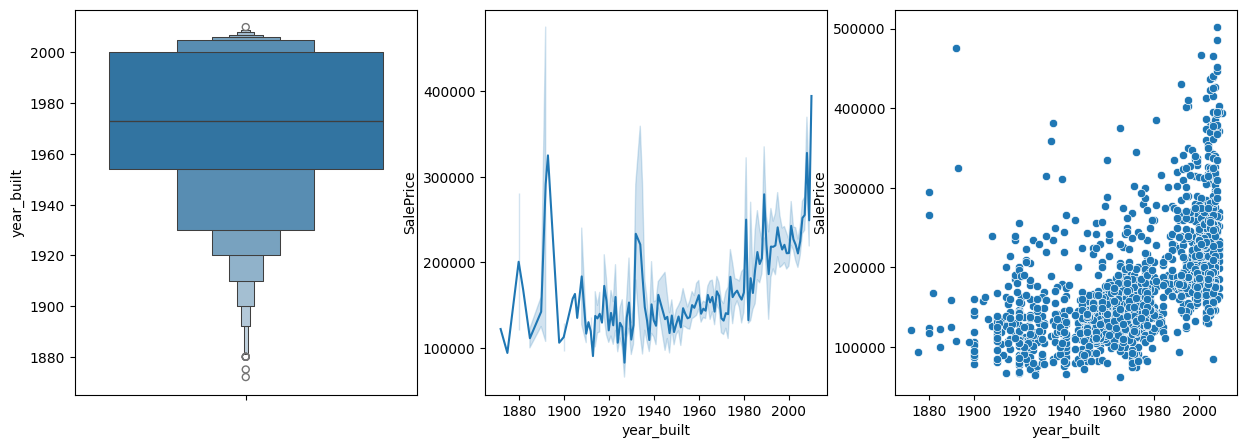

In [8]:
fig, axe = plt.subplots(1, 3, figsize=(15, 5))

sns.boxenplot(feature["year_built"], ax=axe[0])
sns.lineplot(x=feature["year_built"], y=feature["SalePrice"], ax=axe[1])
sns.scatterplot(x=feature["year_built"], y=feature["SalePrice"], ax=axe[2])

print(feature["year_built"].quantile(0.999))
print(feature["year_built"].quantile(0.02))

In [9]:
Q1 = feature["year_built"].quantile(0.02)
Q2 = feature["year_built"].quantile(0.999)

df = clean.remove_outliers_quantile(Q1, Q2, "year_built", feature)
feature = df

29


2009.0
1914.14


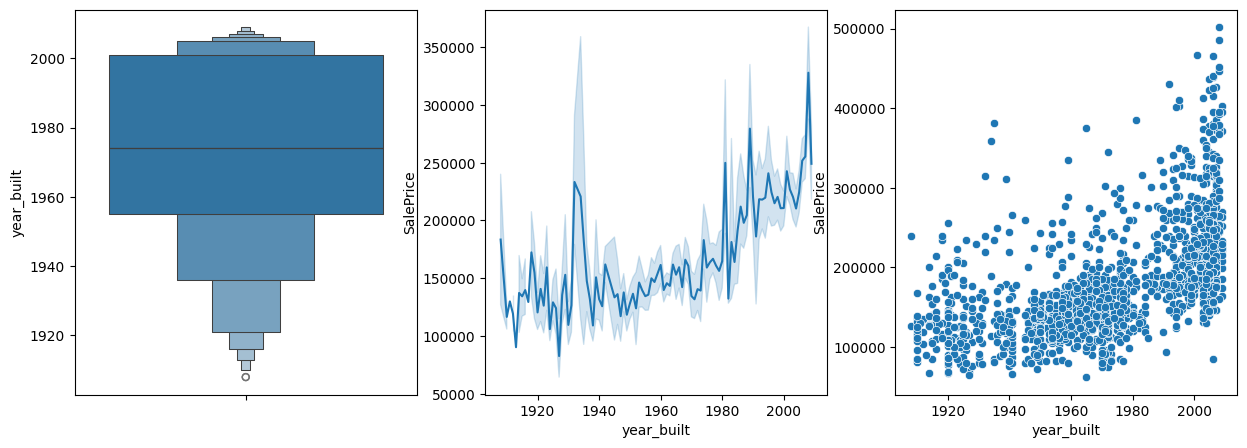

In [10]:
fig, axe = plt.subplots(1, 3, figsize=(15, 5))

sns.boxenplot(feature["year_built"], ax=axe[0])
sns.lineplot(x=feature["year_built"], y=feature["SalePrice"], ax=axe[1])
sns.scatterplot(x=feature["year_built"], y=feature["SalePrice"], ax=axe[2])

print(feature["year_built"].quantile(0.999))
print(feature["year_built"].quantile(0.02))

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            1.3 year_remodel_add:
            </span>   
        </font>    
</h3>


2010.0
1950.0


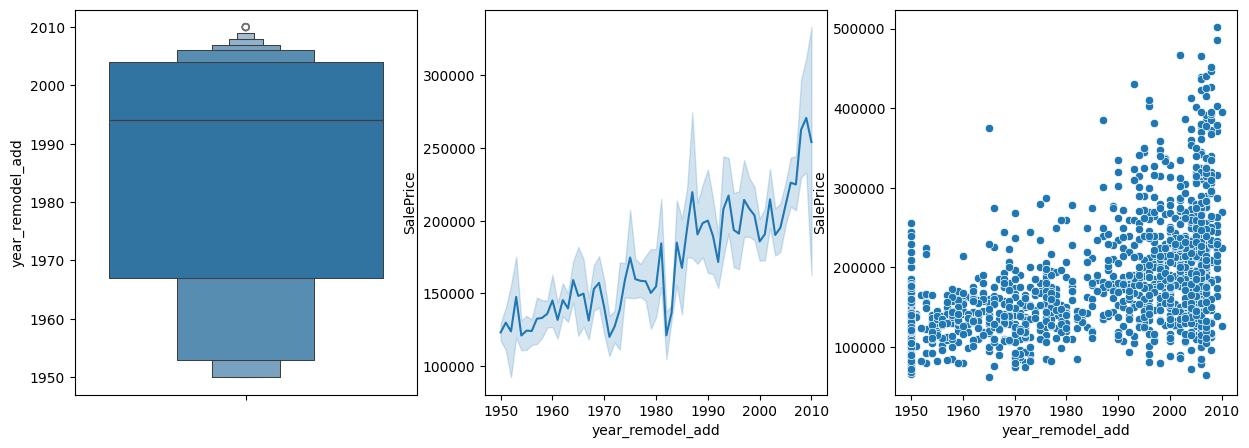

In [11]:
fig, axe = plt.subplots(1, 3, figsize=(15, 5))

sns.boxenplot(feature["year_remodel_add"], ax=axe[0])
sns.lineplot(x=feature["year_remodel_add"], y=feature["SalePrice"], ax=axe[1])
sns.scatterplot(x=feature["year_remodel_add"], y=feature["SalePrice"], ax=axe[2])

print(feature["year_remodel_add"].quantile(0.999))
print(feature["year_remodel_add"].quantile(0.02))

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: No Outliers</b><br>
    </span>    
</div>


<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            1.4 garage_year_build:
            </span>   
        </font>    
</h3>


2009.593
1900.0


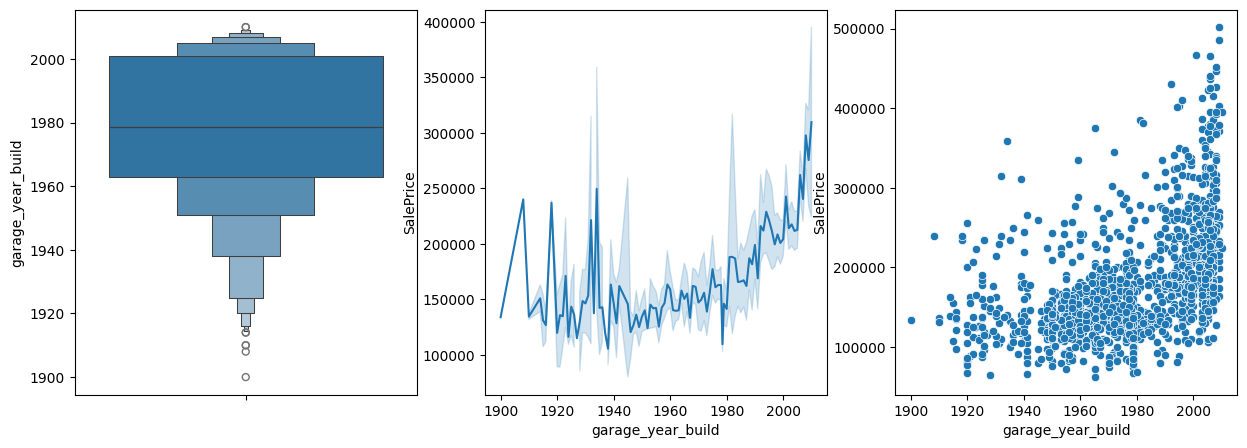

In [12]:
fig, axe = plt.subplots(1, 3, figsize=(15, 5))

sns.boxenplot(feature["garage_year_build"], ax=axe[0])
sns.lineplot(x=feature["garage_year_build"], y=feature["SalePrice"], ax=axe[1])
sns.scatterplot(x=feature["garage_year_build"], y=feature["SalePrice"], ax=axe[2])

print(feature["garage_year_build"].quantile(0.999))
print(feature["garage_year_build"].quantile(0.0))

The dot on the far right is alone because it feels sad


In [13]:
Q1 = feature["garage_year_build"].quantile(0.00)
Q2 = feature["garage_year_build"].quantile(0.999)

df = clean.remove_outliers_quantile(Q1, Q2, "garage_year_build", feature)
feature = df

2


<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            1.5 basement_area:
            </span>   
        </font>    
</h3>


2120.4500000000007
0.0


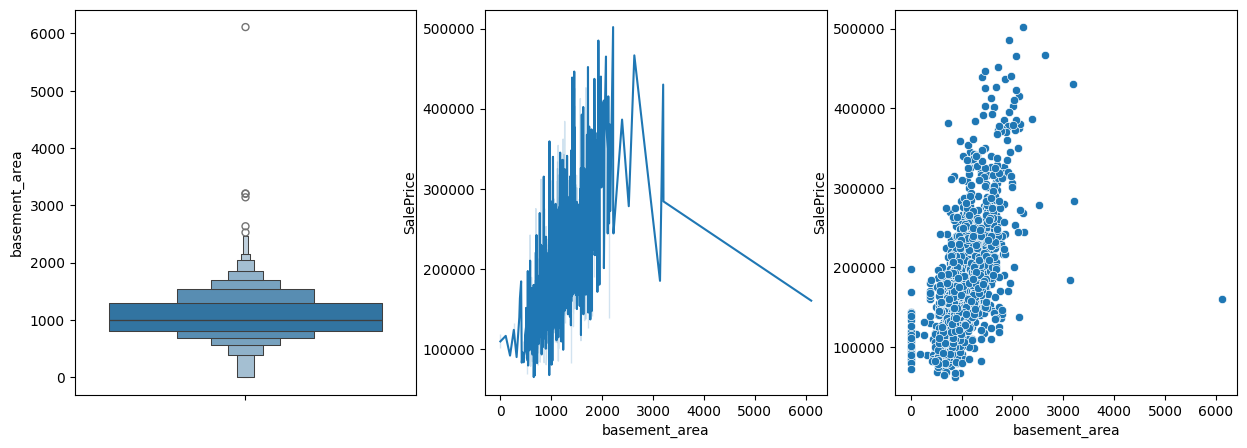

In [14]:
fig, axe = plt.subplots(1, 3, figsize=(15, 5))

sns.boxenplot(feature["basement_area"], ax=axe[0])
sns.lineplot(x=feature["basement_area"], y=feature["SalePrice"], ax=axe[1])
sns.scatterplot(x=feature["basement_area"], y=feature["SalePrice"], ax=axe[2])

print(feature["basement_area"].quantile(0.99))

print(feature["basement_area"].quantile(0.01))

In [15]:
Q1 = feature["basement_area"].quantile(0.026)
Q2 = feature["basement_area"].quantile(0.99)
df = clean.remove_outliers_quantile(Q1, Q2, "basement_area", feature)

51


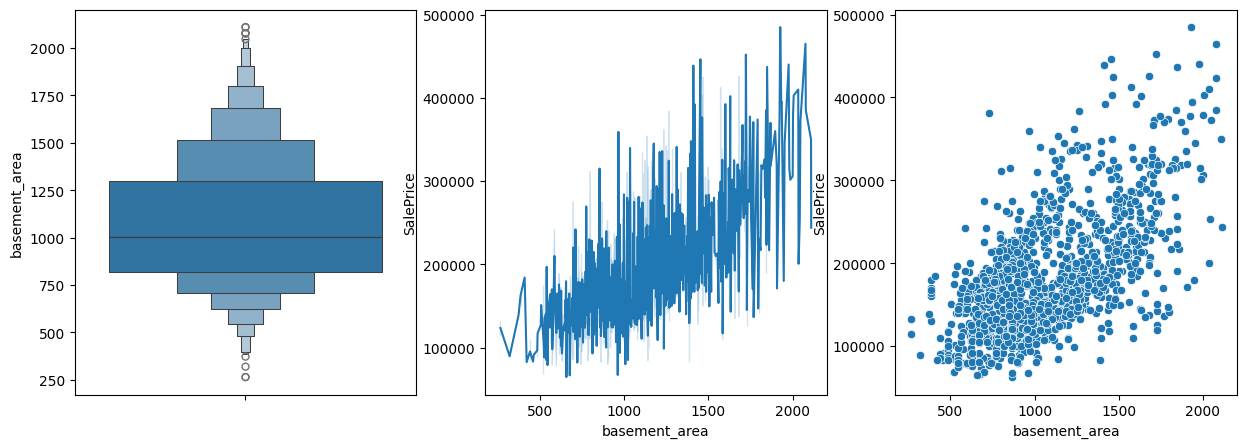

In [16]:
fig, axe = plt.subplots(1, 3, figsize=(15, 5))

sns.boxenplot(df["basement_area"], ax=axe[0])
sns.lineplot(x=df["basement_area"], y=df["SalePrice"], ax=axe[1])
sns.scatterplot(x=df["basement_area"], y=df["SalePrice"], ax=axe[2])

feature = df

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            1.6 grade_living_area:
            </span>   
        </font>    
</h3>


2653.3600000000006
625.912


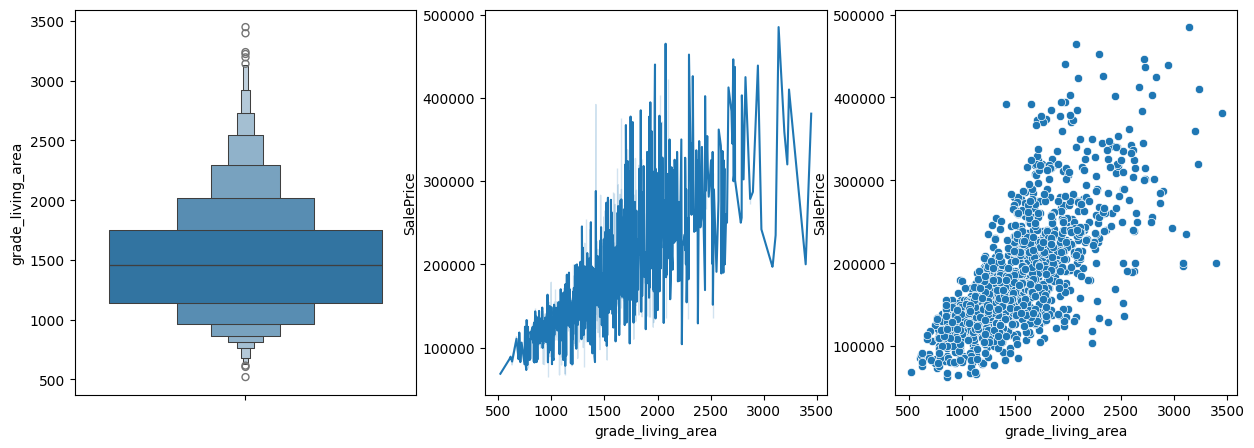

In [17]:
fig, axe = plt.subplots(1, 3, figsize=(15, 5))

sns.boxenplot(feature["grade_living_area"], ax=axe[0])
sns.lineplot(x=feature["grade_living_area"], y=feature["SalePrice"], ax=axe[1])
sns.scatterplot(x=feature["grade_living_area"], y=feature["SalePrice"], ax=axe[2])

print(feature["grade_living_area"].quantile(0.98))

print(feature["grade_living_area"].quantile(0.002))

In [18]:
Q1 = feature["grade_living_area"].quantile(0.002)
Q2 = feature["grade_living_area"].quantile(0.98)
df = clean.remove_outliers_quantile(Q1, Q2, "grade_living_area", feature)

31


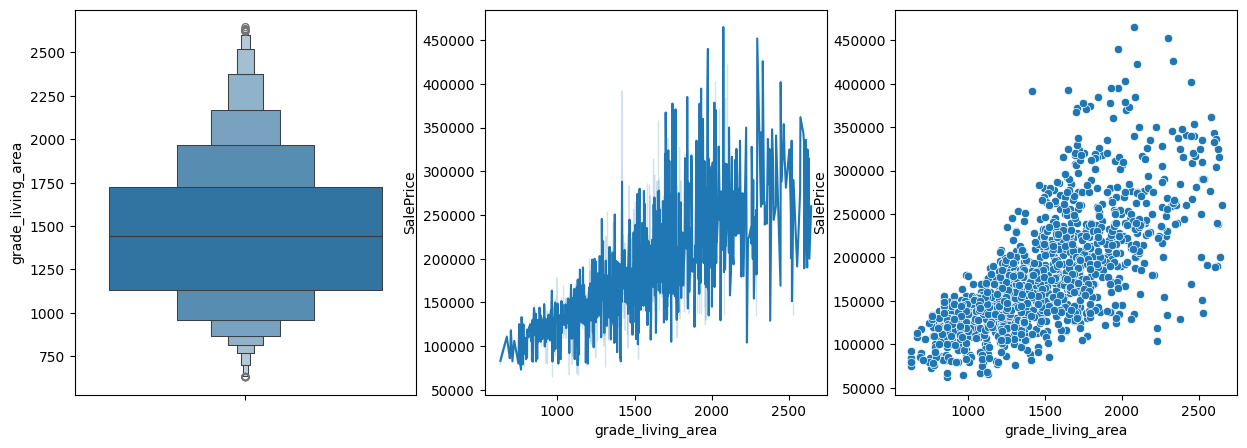

In [19]:
fig, axe = plt.subplots(1, 3, figsize=(15, 5))

sns.boxenplot(df["grade_living_area"], ax=axe[0])
sns.lineplot(x=df["grade_living_area"], y=df["SalePrice"], ax=axe[1])
sns.scatterplot(x=df["grade_living_area"], y=df["SalePrice"], ax=axe[2])
feature = df

In [20]:
feature

,house_area,quality,year_built,year_remodel_add,garage_year_build,number_of_bathrooms,basement_area,has_Fireplaces_or_not,TotRmsAbvGrd,grade_living_area,garage_area,garage_capacite,SalePrice
0,8450,7,2003,2003,2003.0,2,856,0,8,1710,548,2,208500
1,9600,6,1976,1976,1976.0,2,1262,1,6,1262,460,2,181500
2,11250,7,2001,2002,2001.0,2,920,1,6,1786,608,2,223500
3,9550,7,1915,1970,1998.0,1,756,1,7,1717,642,3,140000
4,14260,8,2000,2000,2000.0,2,1145,1,9,2198,836,3,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,1999,2000,1999.0,2,953,1,7,1647,460,2,175000
1456,13175,6,1978,1988,1978.0,2,1542,2,7,2073,500,2,210000
1457,9042,7,1941,2006,1941.0,2,1152,2,9,2340,252,1,266500
1458,9717,5,1950,1996,1950.0,1,1078,0,5,1078,240,1,142125


In [21]:
for col in test.columns:
    test[col] = test[col].astype({col: "int32"})

In [22]:
test.to_csv(
    r"/home/ahmed/Ai/Data science and Ml projects/House-Prices-Prediction---Data-Science-Ml-project/final_cleaned_datasets/test.csv"
)
feature.to_csv(
    r"/home/ahmed/Ai/Data science and Ml projects/House-Prices-Prediction---Data-Science-Ml-project/final_cleaned_datasets/train.csv"
)

In [23]:
test

,house_area,quality,year_built,year_remodel_add,garage_year_build,number_of_bathrooms,basement_area,has_Fireplaces_or_not,TotRmsAbvGrd,grade_living_area,garage_area,garage_capacite,SalePrice
0,11622,5,1961,1961,1961,1,882,0,5,896,730,1,169277
1,14267,6,1958,1958,1958,1,1329,0,6,1329,312,1,187758
2,13830,5,1997,1998,1997,2,928,1,6,1629,482,2,183583
3,9978,6,1998,1998,1998,2,926,1,7,1604,470,2,179317
4,5005,8,1992,1992,1992,2,1280,0,5,1280,506,2,150730
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1936,4,1970,1970,1977,1,546,0,5,1092,0,0,167081
1455,1894,4,1970,1970,1970,1,546,0,6,1092,286,1,164788
1456,20000,5,1960,1996,1960,1,1224,1,7,1224,576,2,219222
1457,10441,5,1992,1992,1977,1,912,0,6,970,0,0,184924


In [24]:
feature

,house_area,quality,year_built,year_remodel_add,garage_year_build,number_of_bathrooms,basement_area,has_Fireplaces_or_not,TotRmsAbvGrd,grade_living_area,garage_area,garage_capacite,SalePrice
0,8450,7,2003,2003,2003.0,2,856,0,8,1710,548,2,208500
1,9600,6,1976,1976,1976.0,2,1262,1,6,1262,460,2,181500
2,11250,7,2001,2002,2001.0,2,920,1,6,1786,608,2,223500
3,9550,7,1915,1970,1998.0,1,756,1,7,1717,642,3,140000
4,14260,8,2000,2000,2000.0,2,1145,1,9,2198,836,3,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,1999,2000,1999.0,2,953,1,7,1647,460,2,175000
1456,13175,6,1978,1988,1978.0,2,1542,2,7,2073,500,2,210000
1457,9042,7,1941,2006,1941.0,2,1152,2,9,2340,252,1,266500
1458,9717,5,1950,1996,1950.0,1,1078,0,5,1078,240,1,142125
